# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"  # Mars temperature site
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
import requests

soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')


In [11]:
# Extract all rows of data
rows = table.find_all('tr')[1:]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
Mars_Data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    Mars_Data.append(row_data)

print("First 5 rows of data:", Mars_Data[:5])

First 5 rows of data: [['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]


In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd

headers = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

df = pd.DataFrame(Mars_Data, columns=headers)


In [15]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
print("Column Data Types:")
print(df.dtypes)

print("Column Data Types:")
print(df.dtypes)

Column Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object
Column Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [17]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [18]:
# Confirm type changes were successful by examining data types again
print("Updated Column Data Types:")
print(df.dtypes)

Updated Column Data Types:
id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
print(f"Number of months on Mars: {unique_months}")

Number of months on Mars: 12


In [20]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = df['sol'].nunique()
print(f"Number of Martian days worth of data: {martian_days}")

Number of Martian days worth of data: 1867


In [21]:
# 3. What is the average minimum temperature by month?
avg_min_temp_per_month = df.groupby('month')['min_temp'].mean()

coldest_month = avg_min_temp_per_month.idxmin()
warmest_month = avg_min_temp_per_month.idxmax()

print(f"Coldest month on Mars: {coldest_month}")
print(f"Warmest month on Mars: {warmest_month}")


Coldest month on Mars: 3
Warmest month on Mars: 8


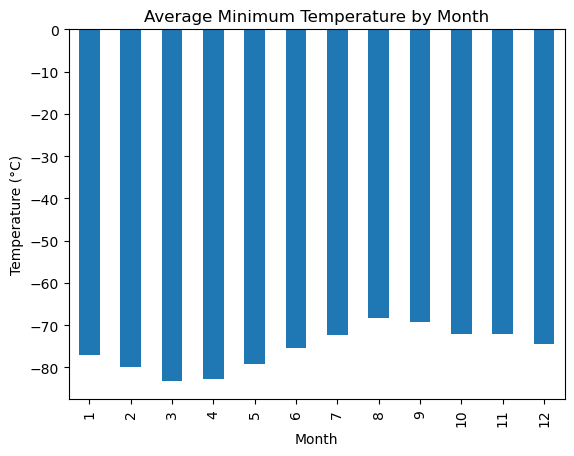

In [22]:
# Plot the average minimum temperature by month
avg_min_temp_per_month.plot(kind='bar', title='Average Minimum Temperature by Month', ylabel='Temperature (°C)', xlabel='Month')
plt.show()

Month with lowest atmospheric pressure: 6
Month with highest atmospheric pressure: 9


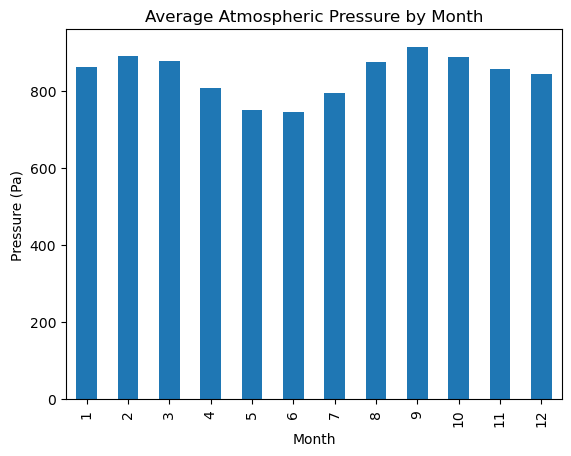

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_pressure_per_month = df.groupby('month')['pressure'].mean()

lowest_pressure_month = avg_pressure_per_month.idxmin()
highest_pressure_month = avg_pressure_per_month.idxmax()

print(f"Month with lowest atmospheric pressure: {lowest_pressure_month}")
print(f"Month with highest atmospheric pressure: {highest_pressure_month}")

avg_pressure_per_month.plot(kind='bar', title='Average Atmospheric Pressure by Month', ylabel='Pressure (Pa)', xlabel='Month')
plt.show()

In [24]:
# 4. What is the average pressure by month?
avg_pressure_per_month = df.groupby('month')['pressure'].mean()

print("Average Atmospheric Pressure by Month:")
print(avg_pressure_per_month)

Average Atmospheric Pressure by Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


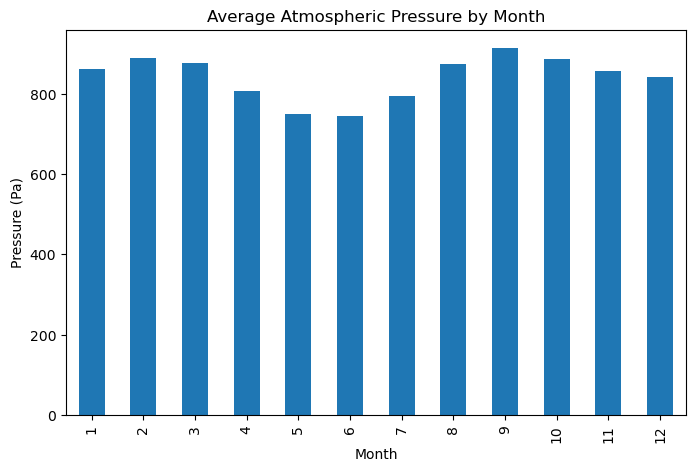

In [25]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', title='Average Atmospheric Pressure by Month', ylabel='Pressure (Pa)', xlabel='Month', figsize=(8, 5))
plt.show()

Sorted Average Atmospheric Pressure by Month:
month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

Month with Lowest Atmospheric Pressure: 6
Month with Highest Atmospheric Pressure: 9


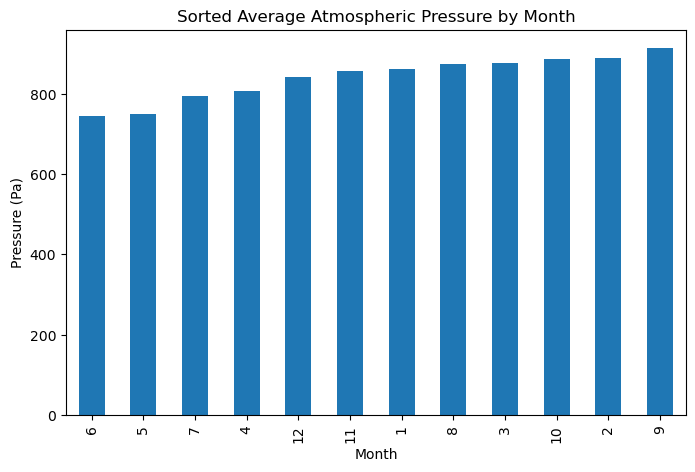

In [26]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_per_month.sort_values()

print("Sorted Average Atmospheric Pressure by Month:")
print(sorted_avg_pressure)

lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

print(f"\nMonth with Lowest Atmospheric Pressure: {lowest_pressure_month}")
print(f"Month with Highest Atmospheric Pressure: {highest_pressure_month}")

sorted_avg_pressure.plot(kind='bar', title='Sorted Average Atmospheric Pressure by Month', ylabel='Pressure (Pa)', xlabel='Month', figsize=(8, 5))
plt.show()

One Martian year is approximately 686.04 terrestrial (Earth) days.


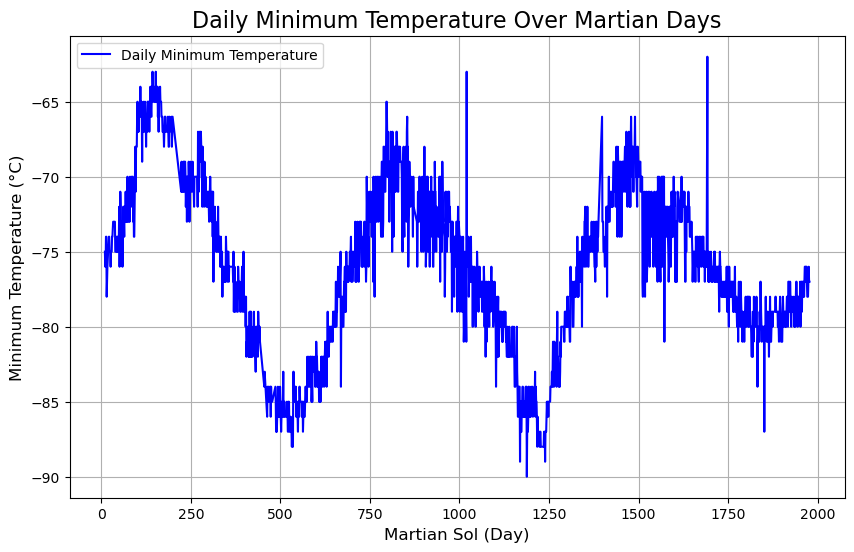

In [27]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
import matplotlib.pyplot as plt

sol_period = 668

martian_year_in_earth_days = sol_period * 1.027

print(f"One Martian year is approximately {martian_year_in_earth_days:.2f} terrestrial (Earth) days.")

plt.figure(figsize=(10, 6))
plt.plot(df['sol'], df['min_temp'], label='Daily Minimum Temperature', color='blue')

plt.title('Daily Minimum Temperature Over Martian Days', fontsize=16)
plt.xlabel('Martian Sol (Day)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Analysis of the Minimum Temperature on Mars

## Objective

### Students were asked to analyze the daily minimum temperatures on Mars, identify the coldest and warmest months, and visually estimate the length of a Martian year in terrestrial days by observing periodic patterns in the temperature data. An analysis of the atmospheric pressures was also performed. 

## Findings

### 1. Mars's coldest and warmest months:
- Coldest month: Month 3 is the coldest month on Mars
- Warmest month: Month 9 is the warmest month on Mars.
- Seasonal trend: A cyclic pattern can be identified with the average minimum temperature, wiht the coldest and warmest months aligning with different points in Mar's orbital path around the sun.

### 2. Visualization:
- A bar chart was used to show the average minimum temperatures by month. It showed that coldest and warmest months clearly.
- The data showing the cyclic nature helps us to identify that a predictable  seasonal temperature pattern that correlates to Mars's orbital patterns. 

### Atmospheric Pressure

### 1. Lowest and Highest:
- Month 9 is the lowest pressure month
- Month 3 is the highest perssure month

### 2. Variation of Seasons:
- A cyclic pattern is present across the 12 Martian months.
- It is diven by the sublimation and depostion of CO2 at the poles.

### 3. Visualization:
- A bar chart was utilized to show the average atmospheric pressure by month to make it easier to identify the seasonal cycles.
- The trend aligns with the known seasonal patterns. 

### Year Length

### 1. The Martian length of year data shows:
- Length is approximately 668 sols
- This correlates to approximately 686 Earth days. 

### 2. Visualization:
- The length of the Mars's year was represented by plotting the daily minimum temperatures over the Martian sols (days), a periodic pattern was observed. 



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
df.to_csv('mars_data_analysis.csv', index=False)

print("Data successfully written to 'mars_data_analysis.csv'")

Data successfully written to 'mars_data_analysis.csv'


In [29]:
browser.quit()